In [1]:
from sympy import *
x,y,z = symbols('x y z')
a,ax, b,c,r,alpha, k, ka = symbols('a a_x b c r alpha k k_a', real=True, positive=True)
beta, q, eps0 = symbols('beta q epsilon_0', real=True)

In [2]:
from mylibs.plots import plotfn
import numpy as np


In [3]:
init_printing()

In [4]:
%matplotlib inline

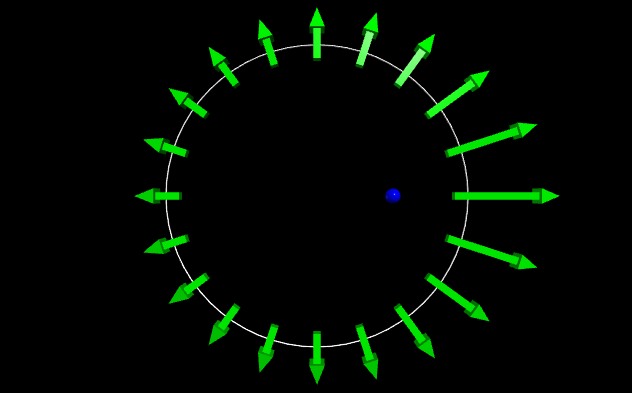

In [5]:
from sympy.vector import CoordSysCartesian
N = CoordSysCartesian('N')

$\tilde{p}$ is any point on a sphere.  $\alpha$ is the angle made inside and at the origin of the x-y plane from the positive x axis and ranges $ 0 \leq \alpha \leq 2\pi$.  $\beta$ is the angle made between the x-y plane and vertically parallel to the z axis ranging from $-\pi \leq \beta \leq \pi$.

In [6]:
p = r*(cos(alpha)*cos(beta)*N.i+sin(alpha)*cos(beta)*N.j+sin(beta)*N.k)
p

Calculate $\frac{\delta \tilde{p}}{\delta \alpha}$

In [7]:
pa = diff(p,alpha)
pa

Calculate $\frac{\delta \tilde{p}}{\delta \beta}$

In [8]:
pb = diff(p,beta)
pb

Calculate $\frac{\delta \tilde{p}}{\delta \alpha} \times \frac{\delta \tilde{p}}{\delta \beta} $

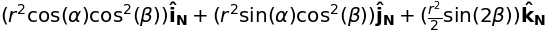

In [9]:
px = pa.cross(pb)
px.simplify()

Calculate $\left | \frac{\delta \tilde{p}}{\delta \alpha} \times \frac{\delta \tilde{p}}{\delta \beta} \right |$

In [10]:
norm_cross = sqrt(px.dot(px).simplify())
norm_cross

Compute the normal unit vector at the surface of the sphere

In [11]:
px2 = px/(r**2*cos(beta))
nuv = px2.args[0]+px2.args[1]+px2.args[2].simplify()
nuv


Compute $\tilde{p} - \tilde{a}$ where $\tilde{a}$ = &lt;a<sub>x</sub>, 0, 0&gt;

In [12]:
p2 = (r*cos(alpha)*cos(beta)-ax)*N.i + r*sin(alpha)*cos(beta)*N.j + r*sin(beta)*N.k
p2

Compute the unit vector of $\tilde{p} - \tilde{a}$ 

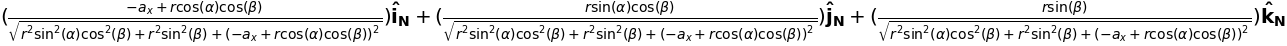

In [13]:
puv = p2/p2.magnitude()
puv

Compute $\tilde{E}_r(\alpha, \beta) \cdot \hat{n}$ where $\hat{n}$ is normal unit vector to gaussian sphere

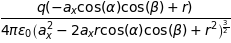

In [14]:
e = q/(p2.dot(p2)*4*pi*eps0)*puv.dot(nuv)
e1=e.factor().trigsimp()
e1

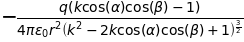

In [15]:
e2 = e1.subs(ax,k*r).factor().simplify()
e2

Now we wish to evaluate $ \iint_{S}  E \cdot dA = \iint_{S} E \cdot \tilde{n} \space d \alpha \space d \beta $

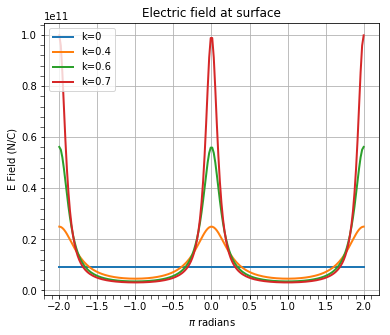

In [16]:
import numpy as np 
def fn1(xs,k1):
    res = [e2.subs([(beta,0),(k,k1),(alpha,np.pi*x),(q,1),(r,1),(eps0, 8.854187817e-12)]).evalf() for x in xs]
    return res


axis, plt = plotfn(fn1, -2, 2, [0,0.4,0.6,0.7],
                 legend_var="k", 
                 title="Electric field at surface",
                 xlabel = "$\pi$ radians",
                 figsize=(6,5))
axis.set_ylabel("E Field (N/C)")
plt.show()